In [13]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from matplotlib.pylab import rcParams
%matplotlib inline
import matplotlib.mlab as mlab
from scipy import stats 

In [14]:
rate = pd.read_csv('data.csv')
data=pd.read_csv('st1.csv')

In [15]:
size = int(len(data) * 0.715)

In [16]:
train, valid = data[0:size], data[size:size+52]

In [17]:
#positive and negative features 
features = ['weak_pulse','emergency_admissions','urbanicity','assualt','pathophysiological','migration',
            'strangulation','self_harming','panic_disorder','December','paperdoll','Alzheimers','blotchy_hands',
            'toxin','infant_mortality','delusion','condolences','Major_Depressive_Disorder','sendentary',
            'neuropathic_pain','funeral_home','death_rattle','congenital_disease','mortality','energy_prices',
            'myocardial_infarction','rhinitis','gun_shot','radiotherapy','dream_death','homicide','stillbirth',
            'myocardial','heart_failure','lung_disease','pain_medicine','feet_swell','ischaemic_heart_disease',
            'Pulmonary_embolism','nervosa','funeral_flower','funeral_ceremony','funeral_arrangements','infarction',
            'convulsion','bowel_disease','death_register','air_pollution','fester','pulmonary','sweating',
            'opiates','warm','blood_viscosity','dry_cough','funeral_director','drug_therapy','suffocation',
            'mumble','high_cholesterol','Christmas','deprivation','funeral_services','menopausal','life_review',
            'suicide','ultrasound','domestic_violence','overcrowded','aneurysm','cremation','carbon_monoxide_poisoning',
            'metabolic','palliative_care','death_certificate','births_deaths','violence','coffin','homelessness',
            'bronchitis','hospital','funeral','hypertension','New_Years_eve','ischaemic','snow','swine_flu',
            'pneumonia','bloated','January','chesty_cough','surgery',
            'damp','wheezing','alcohol','cellulitis','sharp_pain','weekend','freeze','cramps','poison',
            'Christmas_eve','thrombosis','itch','trachea','endocrine','spit','chill','sore_throat','chemotherapy',
            'pregnancy','after_death','funeral_songs','abdominal_pain','drowning','anxiety','morphine',
            'suicide_methods','cervical_cancer','preterm','death_row','lung_cancer','nausea','influenza',
            'neonatal','emigration','knife','goodbye_letter','tuberculosis','air_crash','mental_confusion',
            'purple_feet','car_ownership','bronchitis_cough','death_symbol','palpitation','life_expectancy',
            'physical_inactivity','cut_wrist','burial','funeral_dresses','falling','falls','hanging','home_death',
            'slime','metabolic_disease','drug_overdose','housing_tenure','bowel_cancer','exsanguination',
            'memorial_service','restlessness','heart_disease','neoplasms','tombstones','purple_hands',
            'rheumatiod','physical_weakness','skin_peeling','psychiatric','liver_disease','pandemia','despair',
            'bulimia_nervosa','perinatal_mortality','poverty','obtunded','genitourinary','citalopram',
            'energy_cost','heart_disease','alcohol_abuse','narcotics','endocrine_disease','aids','tornado',
            'Christian_Cross','opioids','ankles_swell','mood_disorder','lethal_injection',
            ]

y_train = rate['weeklydeathrate'][0:size].values
x_train = train[features]
x_valid = valid[features]
y_valid = rate['weeklydeathrate'][size:size+52].values

In [18]:
#index of test data set
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data=pd.read_csv('data.csv',parse_dates=['date'],index_col=0,date_parser=dateparse)
L=data.index[size:size+52]

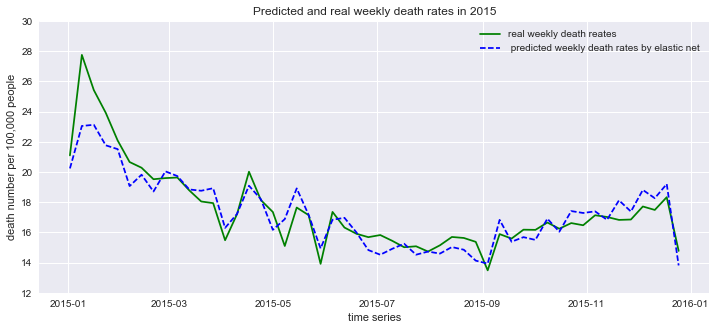

In [19]:
#forecast of weekly death rates in England 
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.149, l1_ratio=0.5,max_iter=10000)
y_pred_enet = enet.fit(x_train, y_train).predict(x_valid)

x = L
z = y_valid
m = y_pred_enet
fig = plt.figure(figsize=(12,5))
plt.plot(x,z,label='real weekly death reates',color='green')
plt.plot(x,m,label=' predicted weekly death rates by elastic net',color="blue",linestyle='--')
plt.xlabel("time series")
plt.ylabel("death number per 100,000 people")
plt.title("Predicted and real weekly death rates in 2015")
from pylab import *
ylim(12,30)
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, make_scorer
mse = mean_squared_error(y_valid, y_pred_enet)
RMSE=np.sqrt(mse)
RMSE

1.0958129258465155

In [21]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_valid, y_pred_enet, sample_weight=None, multioutput='uniform_average')
MAE

0.80028142724463591

In [22]:
from sklearn.utils import check_array
from sklearn.utils.validation import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean((np.abs((y_true - y_pred) / y_true)) * 100)
mape = mean_absolute_percentage_error(y_valid, y_pred_enet)
mape

4.3900317727246634

In [23]:
np.corrcoef(y_valid, y_pred_enet)

array([[ 1.        ,  0.92501048],
       [ 0.92501048,  1.        ]])